In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import datetime
import pandas_bokeh
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [2]:
# Load in csv
bitcoin_tweets_df = pd.read_csv("./Resources/df_Final.csv", sep=';')
bitcoin_tweets_df.head()
#btc_vol_df = pd.read_csv('./Resources/BTC-USD

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),"Volume (Currency),,"
0,2017-08-01 00:00:00,0.082893,1027.0,139.0,347.0,397.0,-0.516620,0.417882,695.0,144.0,2855.81,2863.06,2823.00,2825.92,184.02,"522951,0,"
1,2017-08-01 01:00:00,0.053160,778.0,111.0,193.0,320.0,-0.423402,0.415385,493.0,154.0,2823.01,2860.02,2821.01,2853.38,77.3,"219605.16,,"
2,2017-08-01 02:00:00,0.124251,836.0,89.0,273.0,264.0,-0.440938,0.428661,510.0,210.0,2846.27,2858.04,2837.31,2841.60,135.83,"386739.15,,"
3,2017-08-01 03:00:00,-0.021036,984.0,250.0,236.0,314.0,-0.441173,0.396034,683.0,184.0,2841.84,2863.88,2837.73,2862.93,143.2,"408360.03,,"
4,2017-08-01 04:00:00,0.055437,751.0,114.0,195.0,305.0,-0.414978,0.417159,517.0,137.0,2862.92,2876.00,2848.11,2874.99,222.53,"637045.88,,"


In [3]:
# get end of day price and tweet count
end_price = bitcoin_tweets_df[bitcoin_tweets_df['Date'].str.contains('23:00:00')] # change to 00:00:00 - will remove one day - df needs to be same dimension
end_price['Close']

# remove ',,' and ',0,' from volume in dollars column
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',,', ' ')
bitcoin_tweets_df['Volume (Currency),,'] = bitcoin_tweets_df['Volume (Currency),,'].str.replace(',0,', ' ')

In [4]:
# split date column by date and time
bitcoin_tweets_df[['Date', 'Time']] = bitcoin_tweets_df['Date'].str.split(' ', expand=True)

In [5]:
# get end of day closing price - need to change to 00:00:00 - df will not be same len
end_of_day = bitcoin_tweets_df[bitcoin_tweets_df['Time'].str.contains('23:00:00')]


In [6]:
total_negative = bitcoin_tweets_df.groupby('Date')['Count_Negatives'].sum()
total_positive = bitcoin_tweets_df.groupby('Date')['Count_Positives'].sum()
total_neutral = bitcoin_tweets_df.groupby('Date')['Count_Neutrals'].sum()
close_price = end_of_day.set_index('Date')['Close']
tweet_vol = bitcoin_tweets_df.groupby('Date')['Total Volume of Tweets'].sum()
date = bitcoin_tweets_df['Date'].unique()
# trading_vol = bitcoin_tweets_df.groupby('Date')['Volume (Currency),,'].sum().astype(float)

tweets_dict = {'Closing Price': close_price, 
               'Positive Tweets': total_positive, 
               'Negative Tweets': total_negative, 
               'Neutral Tweets': total_neutral, 
               'Total Volume of Tweets': tweet_vol}

tweets_df = pd.DataFrame(tweets_dict)
tweets_df

,Closing Price,Positive Tweets,Negative Tweets,Neutral Tweets,Total Volume of Tweets
Date,,,,,
2017-08-01,2731.00,6471.0,4701.0,12089.0,30802.0
2017-08-02,2703.51,4734.0,2732.0,9063.0,23726.0
2017-08-03,2793.37,5351.0,3233.0,9806.0,25111.0
2017-08-04,2855.00,4150.0,2703.0,7959.0,21863.0
2017-08-05,3263.62,6258.0,2115.0,8731.0,22123.0
...,...,...,...,...,...
2019-01-17,3682.51,7202.0,3648.0,7294.0,21758.0
2019-01-18,3647.29,6999.0,3557.0,7631.0,23361.0
2019-01-19,3732.40,6474.0,2634.0,5650.0,18587.0


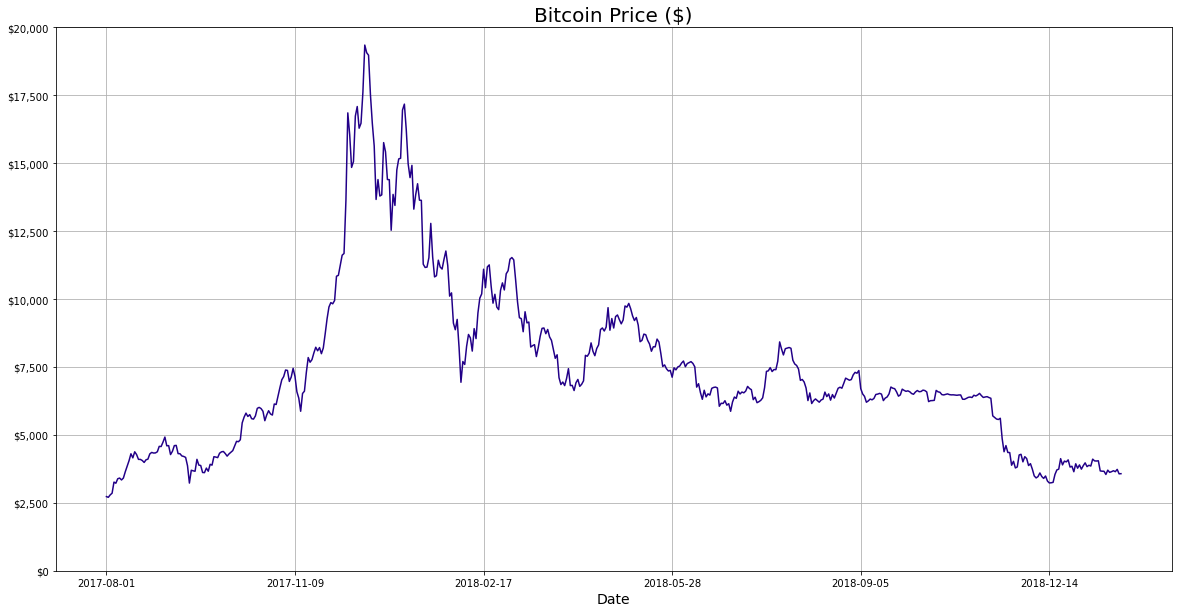

In [7]:
# Bitcoin price changes over the period in the given dataset - beginning and ending price not far off - institutions avoiding capital gain taxes?
ax = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($)', fontdict = {'fontsize': 20})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.set_xlabel('Date', c='black', fontsize=14)
ax.yaxis.set_major_formatter(tick)
plt.grid()
plt.ylim(0, max(tweets_df['Closing Price']) * 1.034)
plt.show()

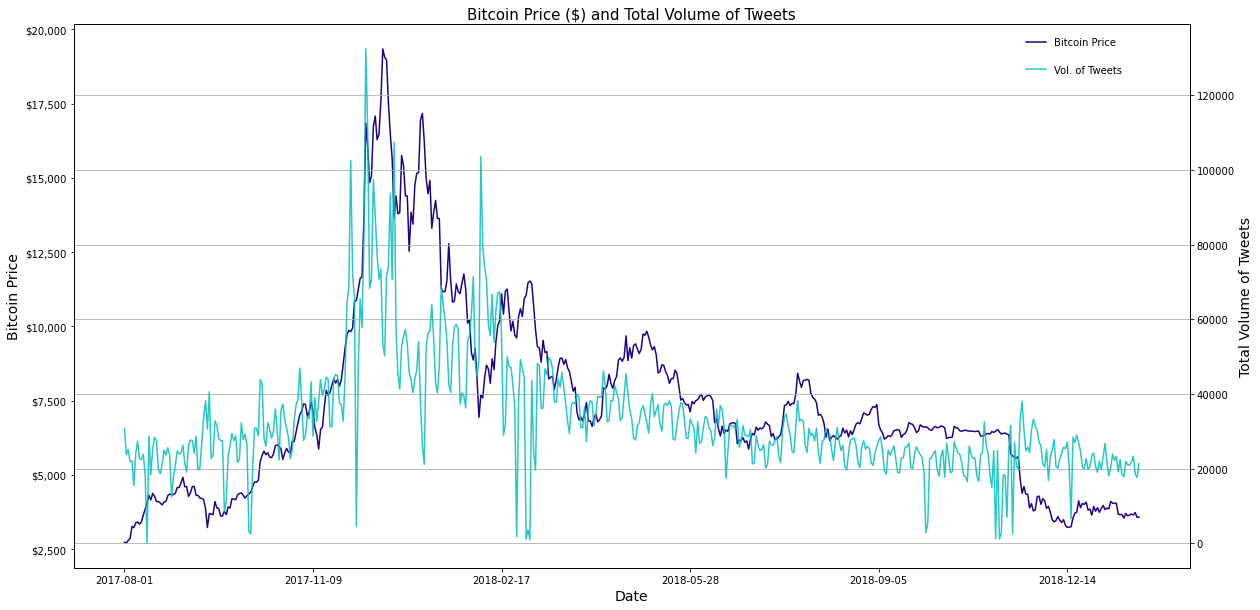

In [31]:
# Bitcoin price and Total volume of tweets
ax1 = tweets_df['Closing Price'].plot(label='Bitcoin Price', color='#208', figsize=(20, 10))
plt.title('Bitcoin Price ($) and Total Volume of Tweets', fontdict = {'fontsize': 15})
yfmt = '${x:,.0f}'
yick = mtick.StrMethodFormatter(yfmt)
ax1.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax1.yaxis.set_major_formatter(yick)
plt.legend()
ax2 = ax1.twinx()
ax2 = tweets_df['Total Volume of Tweets'].plot(secondary_y=True, label='Vol. of Tweets', c='c', alpha=.85)
ax2.set_ylabel('Total Volume of Tweets', color='black', fontsize=14)
plt.legend()
ax1.legend(loc=(.85, .95), frameon=False)
ax2.legend(loc=(.85, .9), frameon=False)
ax1.set_xlabel('Date', c='black', fontsize=14)
#fmt = '{%b}'
#xtick = mdates.DateFormatter('%Y')
#ax1.xaxis.set_major_formatter(xtick)
plt.grid()
plt.show()

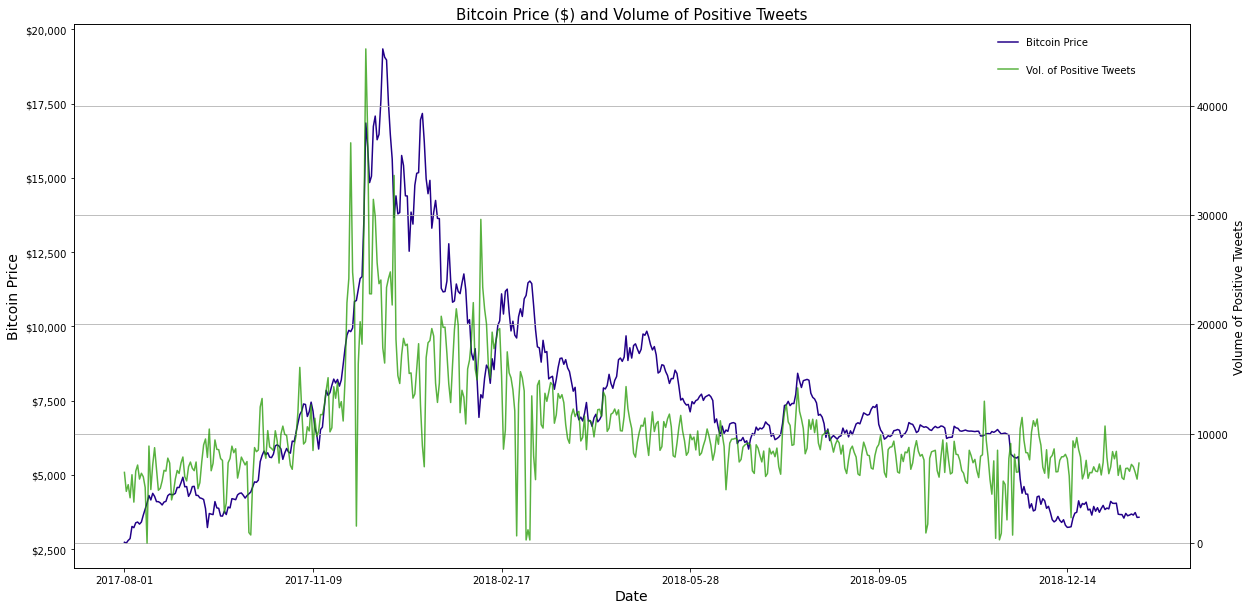

In [16]:
# Bitcoin price and Total Volume of Positive tweets
ax3 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($) and Volume of Positive Tweets', fontdict = {'fontsize': 15})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax3.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax3.yaxis.set_major_formatter(tick)
plt.legend()
ax4 = ax3.twinx()
ax4 = tweets_df['Positive Tweets'].plot(label='Vol. of Positive Tweets', c='#290', alpha=.75)
ax4.set_ylabel('Volume of Positive Tweets', c='black', fontsize=12)
plt.legend()
ax3.legend(loc=(.825, .95), frameon=False)
ax4.legend(loc=(.825, .9), frameon=False)
plt.grid()
ax3.set_xlabel('Date', c='black', fontsize=14)
plt.show()

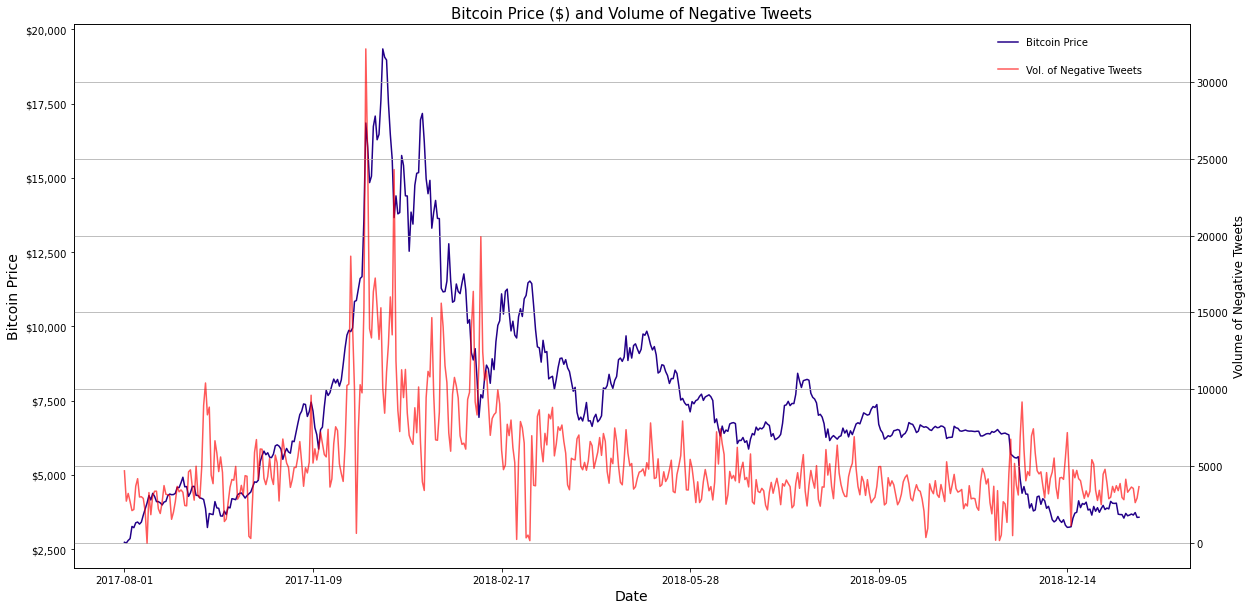

In [17]:
# Bitcoin price and Total Volume of Negative tweets
ax5 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price ($) and Volume of Negative Tweets', fontdict = {'fontsize': 15})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax5.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax5.yaxis.set_major_formatter(tick)
plt.legend()
ax6 = ax5.twinx()
ax6 = tweets_df['Negative Tweets'].plot(label='Vol. of Negative Tweets', c='r', alpha=.65)
ax6.set_ylabel('Volume of Negative Tweets', c='black', fontsize=12)
plt.legend()
ax5.legend(loc=(.825, .95), frameon=False)
ax6.legend(loc=(.825, .9), frameon=False)
plt.grid()
ax5.set_xlabel('Date', c='black', fontsize=14)
plt.show()

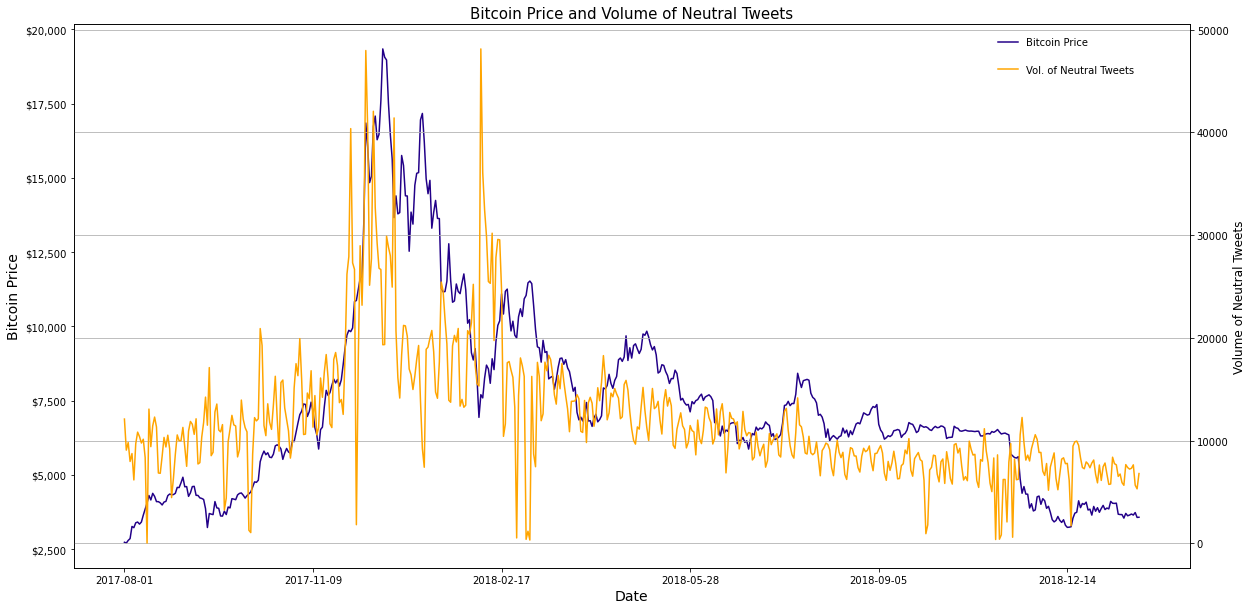

In [18]:
# Bitcoin price and Total Volume of Neutral tweets
ax7 = tweets_df['Closing Price'].plot(label='Bitcoin Price', figsize=(20, 10), c='#208')
plt.title('Bitcoin Price and Volume of Neutral Tweets', fontdict = {'fontsize': 15})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax7.set_ylabel('Bitcoin Price', color='black', fontsize=14)
ax7.yaxis.set_major_formatter(tick)
plt.legend()
ax8 = ax7.twinx()
ax8 = tweets_df['Neutral Tweets'].plot(label='Vol. of Neutral Tweets', c='orange')
ax8.set_ylabel('Volume of Neutral Tweets', c='black', fontsize=12)
plt.legend()
ax7.legend(loc=(.825, .95), frameon=False)
ax8.legend(loc=(.825, .9), frameon=False)
plt.grid()
ax7.set_xlabel('Date', c='black', fontsize=14)
plt.show()

In [19]:
# ignore
neutral_corr = tweets_df['Neutral Tweets'].corr(tweets_df['Closing Price'])
positive_corr = tweets_df['Positive Tweets'].corr(tweets_df['Closing Price'])
negative_corr = tweets_df['Negative Tweets'].corr(tweets_df['Closing Price'])
total_corr = tweets_df['Total Volume of Tweets'].corr(tweets_df['Closing Price'])
corr_df = pd.DataFrame.from_records([{'': 'Correlation', 'Neutral Tweets': neutral_corr, 
                                      'Positive Tweets': positive_corr, 'Negative Tweets': negative_corr, 
                                      'Total Volume of Tweets': total_corr}], index='Neutral Tweets')
pd.options.display.float_format = '{:,.4f}'.format
corr_df.reset_index().set_index('')

,Neutral Tweets,Positive Tweets,Negative Tweets,Total Volume of Tweets
,,,,
Correlation,0.6160,0.6947,0.6092,0.6641
